<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Stock_clustering_on_price_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance


     |████████████████████████████████| 6.3 MB 16.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [44]:
import yfinance as yf
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [83]:
ticker = pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/data/main/ind_nifty50list.csv')
ticker['Symbol']=ticker['Symbol'].apply(lambda x:str(x)+'.ns')

In [84]:
companies_dict=dict(ticker[['Company Name','Symbol']].values)

In [92]:
companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [93]:
# Define which online source to use
#data_source = 'yahoo'

# define start and end dates
start_date = '2017-01-01'
end_date = '2019-01-01'
# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = yf.download(list(companies_dict.values()),start_date, end_date)

print(panel_data.axes)


[*********************100%***********************]  50 of 50 completed
[DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=494, freq=None), MultiIndex([('Adj Close', 'ADANIPORTS.NS'),
            ('Adj Close', 'ASIANPAINT.NS'),
            ('Adj Close',   'AXISBANK.NS'),
            ('Adj Close', 'BAJAJ-AUTO.NS'),
            ('Adj Close', 'BAJAJFINSV.NS'),
            ('Adj Close', 'BAJFINANCE.NS'),
            ('Adj Close', 'BHARTIARTL.NS'),
            ('Adj Close',       'BPCL.NS'),
            ('Adj Close',  'BRITANNIA.NS'),
            ('Adj Close',      'CIPLA.NS'),
            ...
       

In [ ]:
# Find Stock Open and Close Values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])


In [95]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [ ]:
for i in range(0, len(companies)):
 print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))


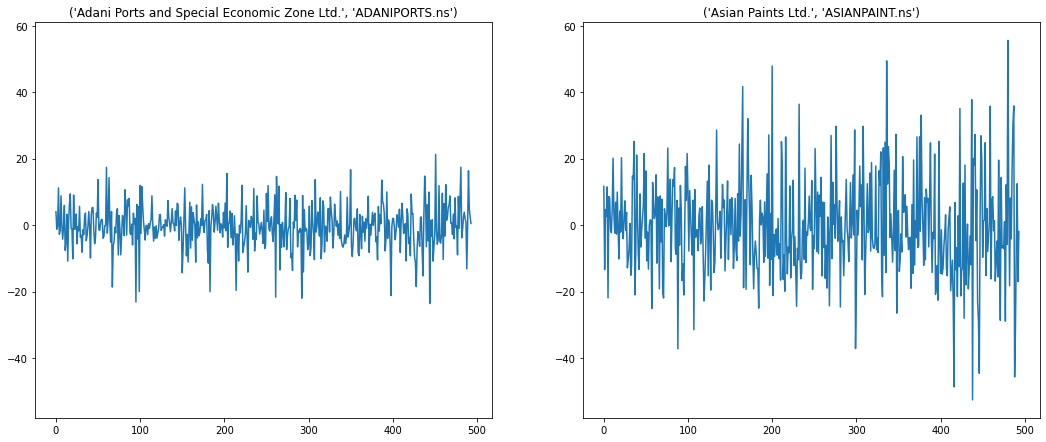

In [97]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [98]:
np.isnan(movements).any()

True

In [99]:
movements[np.isnan(movements)] = np.median(movements[~np.isnan(movements)])

In [100]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.38463319751980346
-0.32305606451558183
-0.0025141085964654145


In [101]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [102]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=10))])

In [103]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                                          companies
2        0                      (Axis Bank Ltd., AXISBANK.ns)
38       0                     (State Bank of India, SBIN.ns)
22       0                    (ICICI Bank Ltd., ICICIBANK.ns)
47       1             (UltraTech Cement Ltd., ULTRACEMCO.ns)
43       1                    (Tata Steel Ltd., TATASTEEL.ns)
42       1                  (Tata Motors Ltd., TATAMOTORS.ns)
30       1                 (Mahindra & Mahindra Ltd., M&M.ns)
29       1                      (Larsen & Toubro Ltd., LT.ns)
27       1                      (JSW Steel Ltd., JSWSTEEL.ns)
20       1            (Hindalco Industries Ltd., HINDALCO.ns)
14       1                (Grasim Industries Ltd., GRASIM.ns)
24       2                            (Infosys Ltd., INFY.ns)
45       2                     (Tech Mahindra Ltd., TECHM.ns)
44       2           (Tata Consultancy Services Ltd., TCS.ns)
15       2                (HCL Technologies Ltd., HCLTECH.ns)
49      

In [104]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                                          companies
1        0                 (Asian Paints Ltd., ASIANPAINT.ns)
4        0                (Bajaj Finserv Ltd., BAJAJFINSV.ns)
5        0                (Bajaj Finance Ltd., BAJFINANCE.ns)
0        1  (Adani Ports and Special Economic Zone Ltd., A...
29       1                      (Larsen & Toubro Ltd., LT.ns)
37       1      (SBI Life Insurance Company Ltd., SBILIFE.ns)
39       1                   (Shree Cement Ltd., SHREECEM.ns)
14       1                (Grasim Industries Ltd., GRASIM.ns)
41       1       (Tata Consumer Products Ltd., TATACONSUM.ns)
48       1                                 (UPL Ltd., UPL.ns)
7        1       (Bharat Petroleum Corporation Ltd., BPCL.ns)
6        1                (Bharti Airtel Ltd., BHARTIARTL.ns)
3        1                   (Bajaj Auto Ltd., BAJAJ-AUTO.ns)
25       1              (Indian Oil Corporation Ltd., IOC.ns)
11       2            (Divi's Laboratories Ltd., DIVISLAB.ns)
12      

<Figure size 432x288 with 0 Axes>

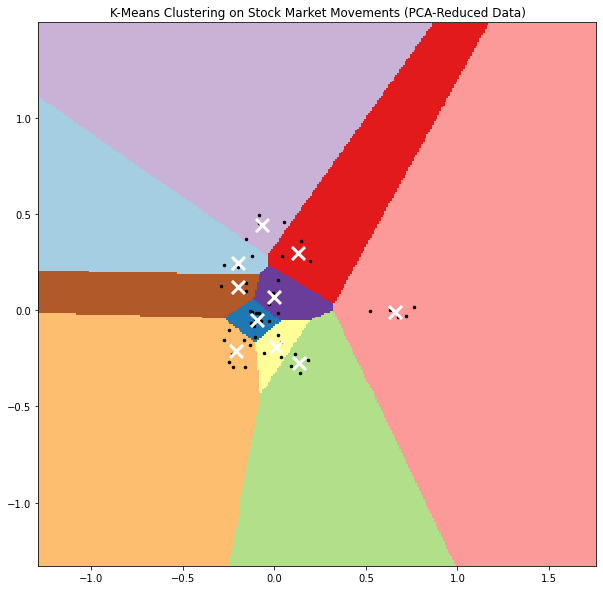

In [105]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
